### import libraries

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


### import and clean the dataframe

In [2]:
# Load the dataset
merged_data = pd.read_csv(r"C:\Users\Amani\Desktop\career foundry\Brazilian E-Commerce project A6\02 data\cleaned data\merged_data.csv")

# Display basic info about the dataset
print(merged_data.info())

# Check for missing values
print(merged_data.isnull().sum())

# Drop any rows with missing numerical values (if necessary)
merged_data.dropna(inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18072338 entries, 0 to 18072337
Data columns (total 33 columns):
 #   Column                                Dtype  
---  ------                                -----  
 0   order_id                              object 
 1   customer_id                           object 
 2   order_status                          object 
 3   order_estimated_delivery_date         object 
 4   customer_unique_id                    object 
 5   customer_zip_code_prefix              int64  
 6   customer_city                         object 
 7   customer_state                        object 
 8   order_item_id                         int64  
 9   product_id                            object 
 10  seller_id                             object 
 11  shipping_limit_date                   object 
 12  price                                 float64
 13  freight_value                         float64
 14  payment_sequential                    float64
 15  payment_type 

In [3]:
# Check for missing values
merged_data.isnull().sum()

order_id                                0
customer_id                             0
order_status                            0
order_estimated_delivery_date           0
customer_unique_id                      0
customer_zip_code_prefix                0
customer_city                           0
customer_state                          0
order_item_id                           0
product_id                              0
seller_id                               0
shipping_limit_date                     0
price                                   0
freight_value                           0
payment_sequential                      0
payment_type                            0
payment_installments                    0
payment_value                           0
product_category_name                   0
product_category_name_english           0
seller_zip_code_prefix                  0
seller_city                             0
seller_state                            0
geolocation_zip_code_prefix_custom

In [6]:
# Selecting only numerical columns
numerical_data = merged_data.select_dtypes(include=['number'])

# Display the first few rows to verify
numerical_data.head()


,customer_zip_code_prefix,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,seller_zip_code_prefix,geolocation_zip_code_prefix_customer,geolocation_zip_code_prefix_seller
0,3149,1,29.99,8.72,1.0,1.0,18.12,9350,3149.0,9350.0
1,3149,1,29.99,8.72,1.0,1.0,18.12,9350,3149.0,9350.0
2,3149,1,29.99,8.72,1.0,1.0,18.12,9350,3149.0,9350.0
3,3149,1,29.99,8.72,1.0,1.0,18.12,9350,3149.0,9350.0
4,3149,1,29.99,8.72,1.0,1.0,18.12,9350,3149.0,9350.0


In [5]:
numerical_data

,customer_zip_code_prefix,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,seller_zip_code_prefix,geolocation_zip_code_prefix_customer,geolocation_zip_code_prefix_seller
0,3149,1,29.99,8.72,1.0,1.0,18.12,9350,3149.0,9350.0
1,3149,1,29.99,8.72,1.0,1.0,18.12,9350,3149.0,9350.0
2,3149,1,29.99,8.72,1.0,1.0,18.12,9350,3149.0,9350.0
3,3149,1,29.99,8.72,1.0,1.0,18.12,9350,3149.0,9350.0
4,3149,1,29.99,8.72,1.0,1.0,18.12,9350,3149.0,9350.0
...,...,...,...,...,...,...,...,...,...,...
18072333,83750,1,68.50,18.36,1.0,1.0,86.86,14407,83750.0,14407.0
18072334,83750,1,68.50,18.36,1.0,1.0,86.86,14407,83750.0,14407.0
18072335,83750,1,68.50,18.36,1.0,1.0,86.86,14407,83750.0,14407.0
18072336,83750,1,68.50,18.36,1.0,1.0,86.86,14407,83750.0,14407.0


In [6]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

### (Elbow Method)

In [7]:
# Define the number of potential clusters in the data
num_cl = range(1,10)

In [8]:
# Define a list of inertia values for each k-means clustering model
inertia = []

for i in num_cl:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(numerical_data)
    inertia.append(kmeans.inertia_)

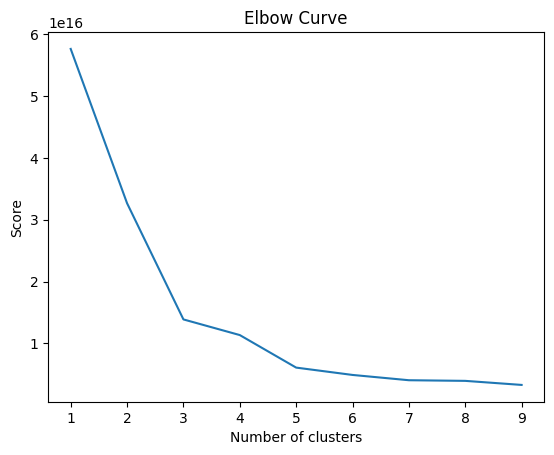

In [9]:
import matplotlib.pyplot as plt

# Plot the scores to visualize the 'elbow'
plt.plot(num_cl, inertia)
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.show()


#### The curve begins to flatten out around 4 clusters. After 4, the reduction in score becomes less significant indicating that more clusters would greatly improve the model's fit. The ideal number of clusters for this dataset is 4.

In [10]:
# Create the kmeans object
Kmeans = KMeans(n_clusters=4)

In [11]:
# Fit the k-means object to the dataframe
Kmeans.fit(numerical_data)

KMeans(n_clusters=4)

In [13]:
# Create new column in dataframe to show the clusters
numerical_data['clusters'] = Kmeans.fit_predict(numerical_data)
numerical_data.head()

,customer_zip_code_prefix,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,seller_zip_code_prefix,geolocation_zip_code_prefix_customer,geolocation_zip_code_prefix_seller,clusters
0,3149,1,29.99,8.72,1.0,1.0,18.12,9350,3149.0,9350.0,1
1,3149,1,29.99,8.72,1.0,1.0,18.12,9350,3149.0,9350.0,1
2,3149,1,29.99,8.72,1.0,1.0,18.12,9350,3149.0,9350.0,1
3,3149,1,29.99,8.72,1.0,1.0,18.12,9350,3149.0,9350.0,1
4,3149,1,29.99,8.72,1.0,1.0,18.12,9350,3149.0,9350.0,1


In [14]:
numerical_data['clusters'].value_counts()

clusters
1    10809794
0     3834536
2     2043164
3     1115447
Name: count, dtype: int64

## Visualizations

In [4]:
merged_data = pd.read_csv(r"C:\Users\Amani\Desktop\career foundry\Brazilian E-Commerce project A6\02 data\cleaned data\merged_data.csv")


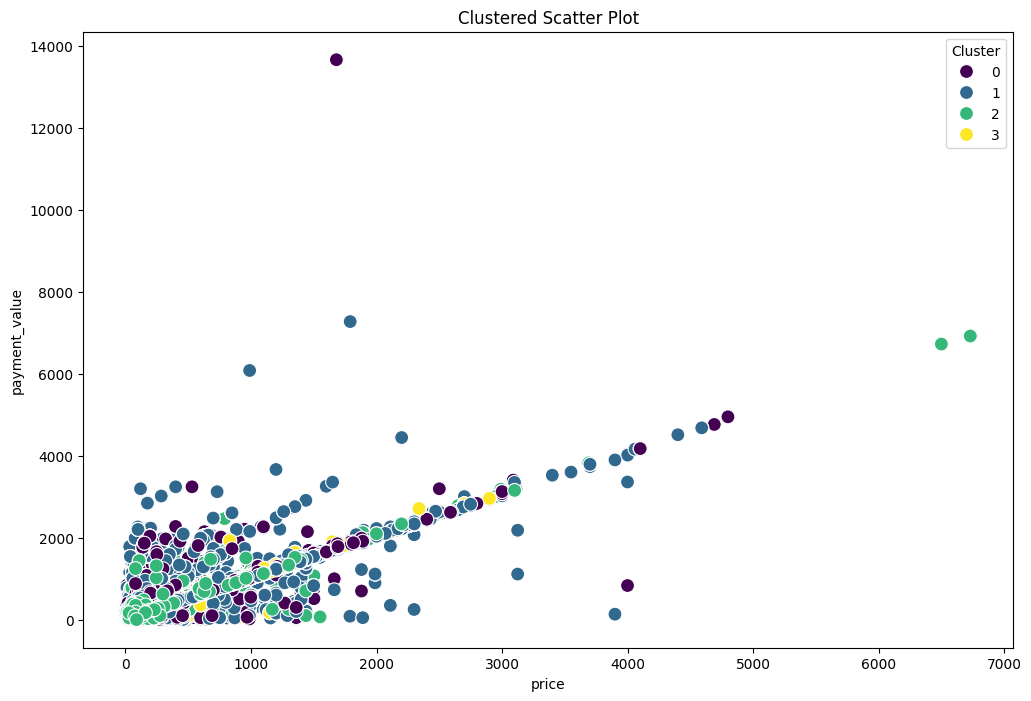

In [8]:
Kmeans = KMeans(n_clusters=4, random_state=42)
Kmeans.fit(numerical_data)

sample_data = numerical_data.sample(n=1000000).copy()

sample_data['Cluster'] = Kmeans.labels_[:len(sample_data)]

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sample_data['price'], 
                     y=sample_data['payment_value'], 
                     hue=sample_data['Cluster'], 
                     palette='viridis', s=100)

plt.xlabel('price')
plt.ylabel('payment_value')
plt.title('Clustered Scatter Plot')
plt.show()


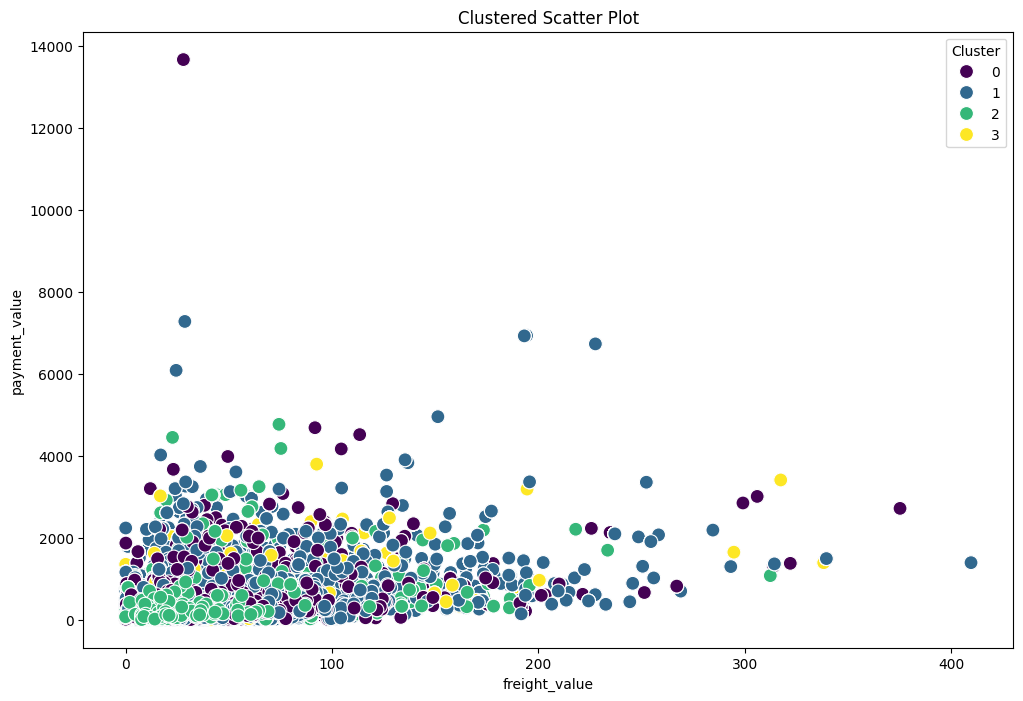

In [9]:
Kmeans = KMeans(n_clusters=4, random_state=42)
Kmeans.fit(numerical_data)

sample_data = numerical_data.sample(n=1000000).copy()

sample_data['Cluster'] = Kmeans.labels_[:len(sample_data)]

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sample_data['freight_value'], 
                     y=sample_data['payment_value'], 
                     hue=sample_data['Cluster'], 
                     palette='viridis', s=100)

plt.xlabel('freight_value')
plt.ylabel('payment_value')
plt.title('Clustered Scatter Plot')
plt.show()


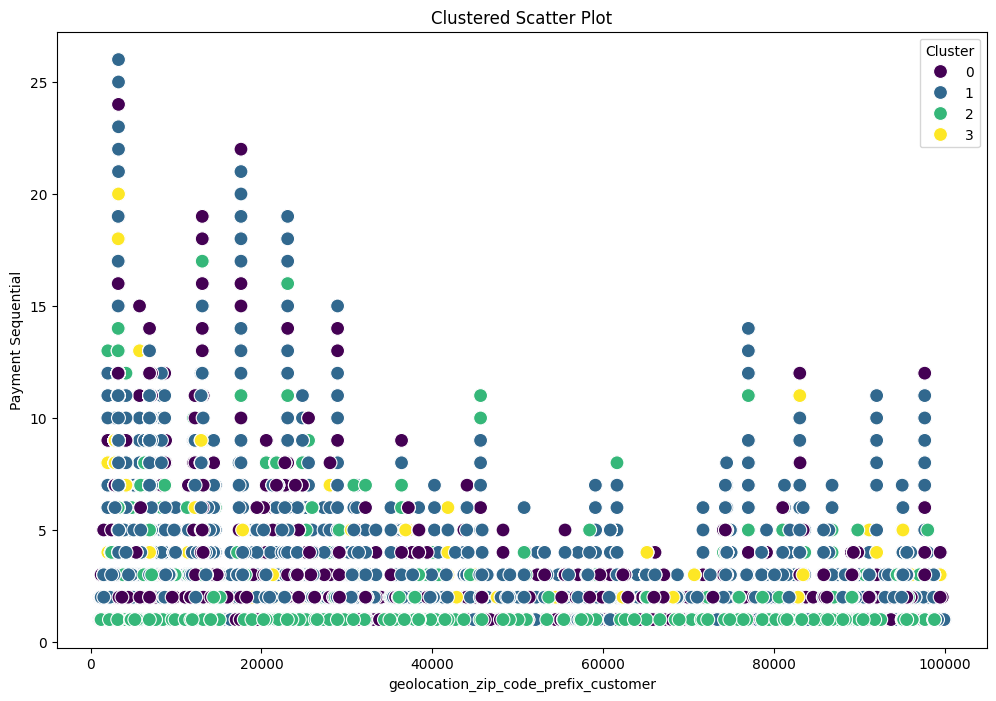

In [37]:

Kmeans = KMeans(n_clusters=4, random_state=42)
Kmeans.fit(numerical_data)

sample_data = numerical_data.sample(n=1000000).copy()

sample_data['Cluster'] = Kmeans.labels_[:len(sample_data)]

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sample_data['geolocation_zip_code_prefix_customer'], 
                     y=sample_data['payment_sequential'], 
                     hue=sample_data['Cluster'], 
                     palette='viridis', s=100)

plt.xlabel('geolocation_zip_code_prefix_customer')
plt.ylabel('Payment Sequential')
plt.title('Clustered Scatter Plot')
plt.show()


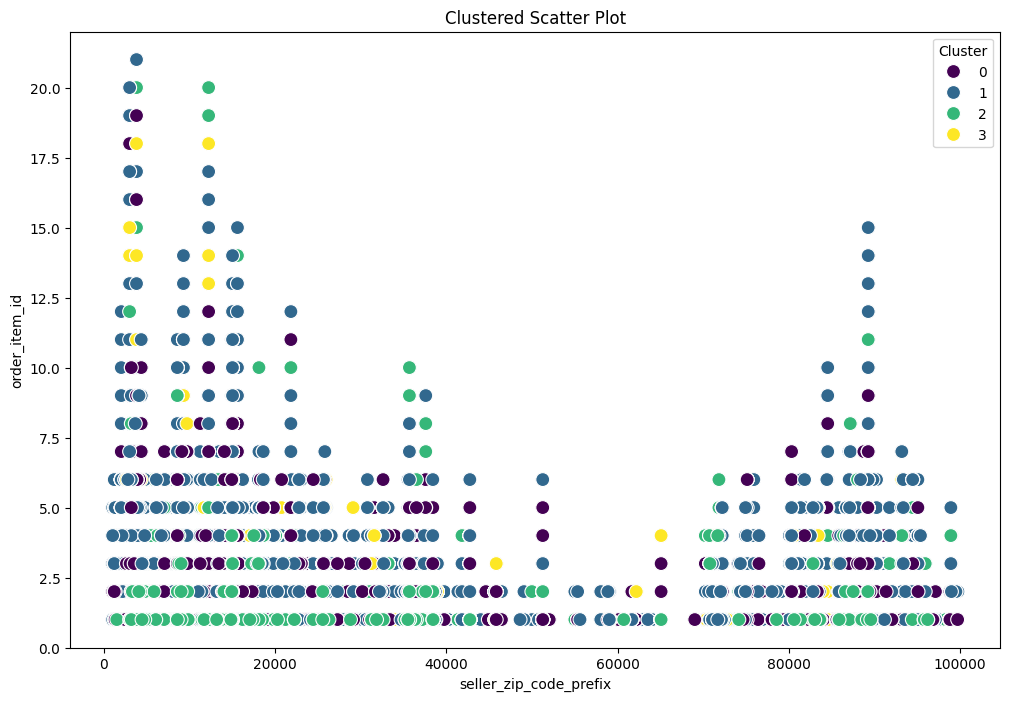

In [38]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sample_data['seller_zip_code_prefix'], 
                     y=sample_data['order_item_id'], 
                     hue=sample_data['Cluster'], 
                     palette='viridis', s=100)

plt.xlabel('seller_zip_code_prefix')
plt.ylabel('order_item_id')
plt.title('Clustered Scatter Plot')
plt.show()


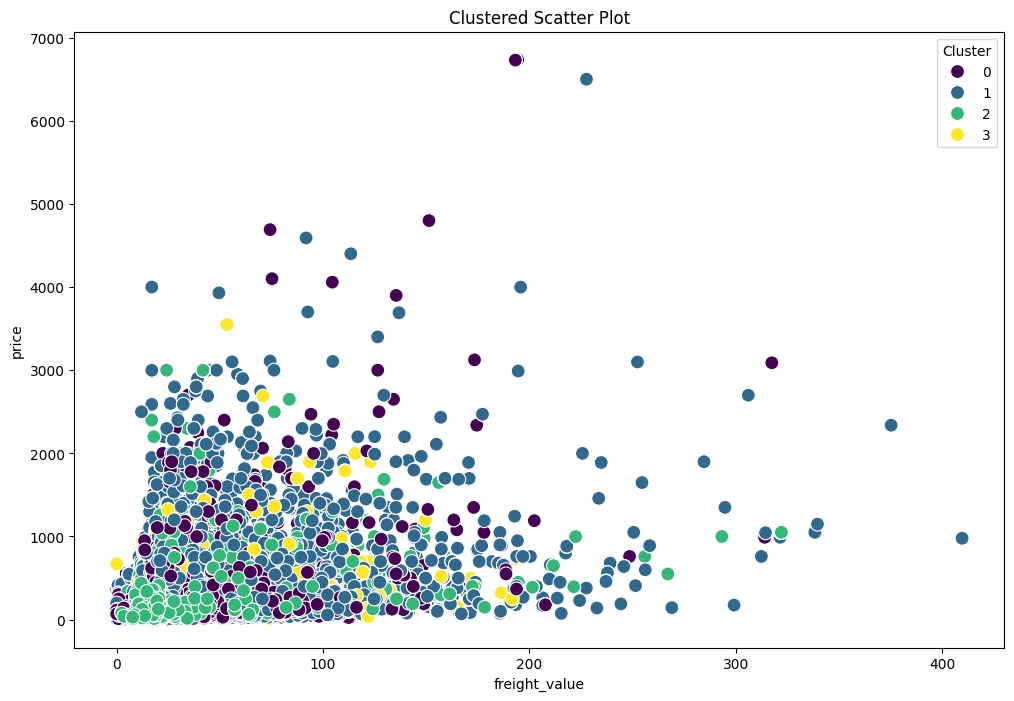

In [39]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sample_data['freight_value'], 
                     y=sample_data['price'], 
                     hue=sample_data['Cluster'], 
                     palette='viridis', s=100)

plt.xlabel('freight_value')
plt.ylabel('price')
plt.title('Clustered Scatter Plot')
plt.show()


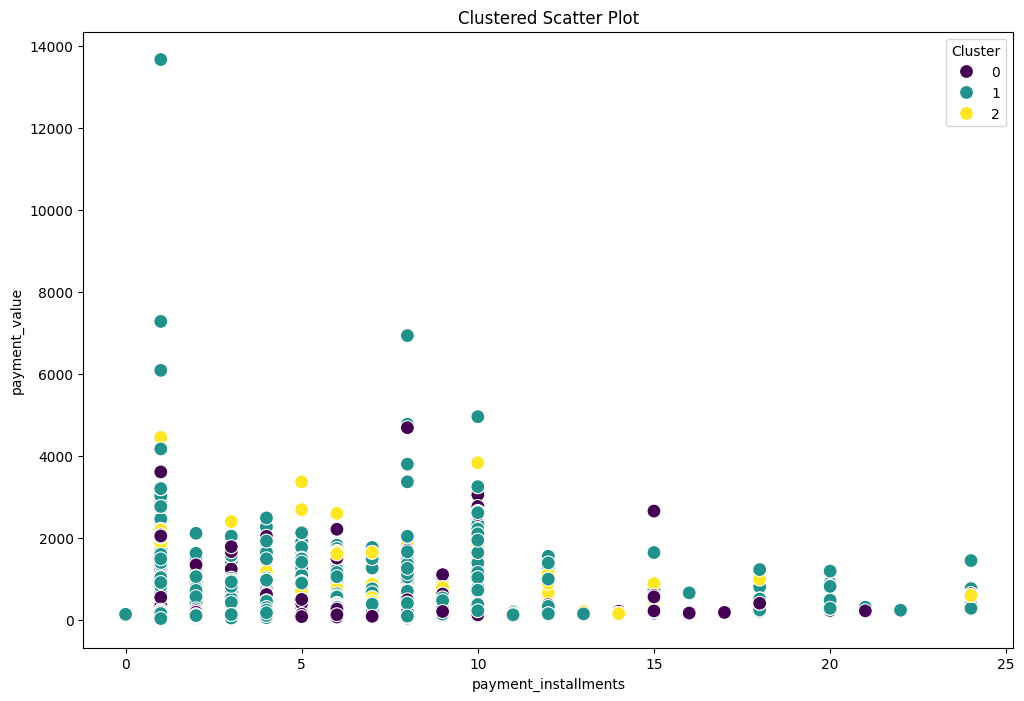

In [33]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sample_data['payment_installments'], 
                     y=sample_data['payment_value'], 
                     hue=sample_data['Cluster'], 
                     palette='viridis', s=100)

plt.xlabel('payment_installments')
plt.ylabel('payment_value')
plt.title('Clustered Scatter Plot')
plt.show()


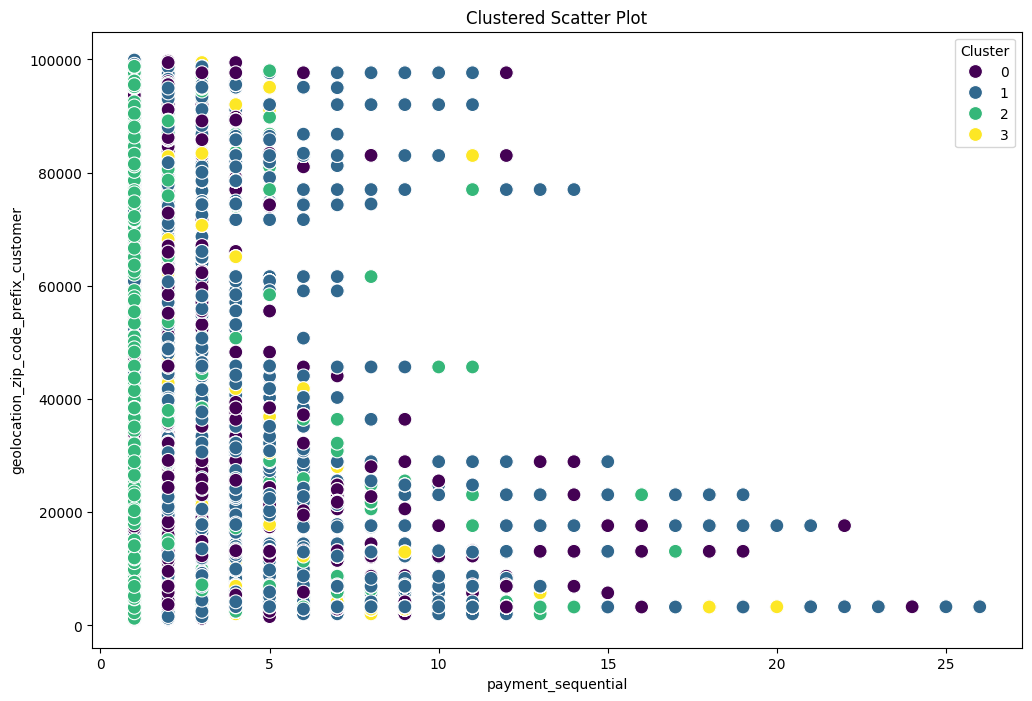

In [42]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sample_data['payment_sequential'], 
                     y=sample_data['geolocation_zip_code_prefix_customer'], 
                     hue=sample_data['Cluster'], 
                     palette='viridis', s=100)

plt.xlabel('payment_sequential')
plt.ylabel('geolocation_zip_code_prefix_customer')
plt.title('Clustered Scatter Plot')
plt.show()


In [10]:

# Ensure the data has cluster labels
numerical_data['Cluster'] = Kmeans.labels_

# Compute descriptive statistics for each cluster
cluster_stats = numerical_data.groupby('Cluster').agg(['mean', 'median', 'std', 'min', 'max', 'count'])

# Format table for better readability
cluster_stats = cluster_stats.style.format("{:.2f}")  # Limit decimals to 2 places

# Display the table
cluster_stats

### Analysis of Clustered Scatter Plots


📌 (Price vs Freight Value)
Most data points are clustered in the bottom-left corner, indicating low shipping costs.
A few high-priced orders with high shipping values appear as outliers.
Clusters are highly overlapping, suggesting weak separation.

📌(Payment Sequential vs Zip Code - Customer)
Data follows a linear pattern, showing repeated sequences in customer payments.
No clear distinction between clusters, implying weak differentiation.

📌 (Zip Code - Seller vs Payment Installments)
Most sellers have low installment payments (below 5).
A few extreme points indicate large installment payments, but no distinct clusters.
Clusters are not well-separated, meaning these variables do not strongly influence clustering.

📌 (Price vs Payment Value)
Somewhat linear relationship between price and payment_value.
Most points are concentrated at the bottom, representing low-value orders.
A few high-payment outliers exist, but clusters remain mixed.

📌 (Payment Installments vs Payment Value)
Most payments involve low installment counts and small values.
Some long-term installment payments appear, but clustering remains weak.
Significant cluster overlap, indicating these features do not provide strong separation.
📌 (Price vs Payment Value)

=== Strong linear relationship between price and payment value.
Some outliers deviate from the trend, potentially indicating special cases.
Clusters appear somewhat clearer, suggesting price and payment value may be useful for segmentation.

### General Observations

📌 Clusters are not well-separated, meaning K-Means may not be the best algorithm for this dataset.
 
📌 Some clearer clustering in price and payment value relationships.
 
📌 Many overlapping points, suggesting weak feature selection.
 
📌Outliers exist, which could impact clustering results.

### Insights & Interpretation

 K-Means clustering does not effectively segment the data, suggesting the need for alternative approaches.

📌 Feature selection may need improvement to enhance clustering effectiveness.
📌 Alternative clustering techniques, such as DBSCAN or Hierarchical Clustering, may yield better results.
📌 The high degree of cluster overlap suggests that customers/orders may not have distinct purchasing behaviors.
📌 Further analysis of outliers and high-payment transactions could reveal important business insights.

### Propose what these results could be useful for in future steps of an analytics pipeline.


📌Customer Segmentation – The clusters can help categorize customers based on purchasing behavior, shipping costs, and payment patterns. This can be used for targeted marketing.

📌Pricing Strategy Optimization – Understanding how price correlates with clusters may help in dynamic pricing strategies.

📌Logistics & Delivery Optimization – Freight value and geolocation insights can enhance delivery efficiency and cost management.

📌Product Demand Analysis – Identifying clusters where certain products are more frequently purchased can inform inventory and stocking strategies.

📌Personalized Recommendations – Insights into customer behavior can help develop recommendation engines for e-commerce platforms.

In [12]:
import os

path = r'C:\Users\Amani\Desktop\career foundry\Brazilian E-Commerce project A6'
merged_data.to_csv(os.path.join(path, '02 data', 'cleaned data', 'merged_data.csv'), index=False)
